<a href="https://colab.research.google.com/github/mathgds/introducao_a_ciencia_de_dados/blob/main/07_knn_algorithm_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo KNN e Classificação Binária



# 1. Introdução

O algoritmo K-Nearest Neighbors (KNN) é um método de classificação e regressão baseado em instâncias que classifica um ponto de dado com base na classe dos seus vizinhos mais próximos. No KNN, a previsão para um ponto novo é feita analisando os K vizinhos mais próximos (ou seja, os pontos de dados mais semelhantes) e atribuindo a classe que é mais comum entre eles. A métrica de distância, como a Euclidiana, é geralmente usada para encontrar esses vizinhos. O KNN é simples e intuitivo, mas pode ser computacionalmente caro em grandes conjuntos de dados, pois requer a comparação de pontos durante a previsão.

Métricas de avaliação de classificadores binários são usadas para medir a eficácia dos algoritmos de classificação em tarefas onde há duas classes distintas. As principais métricas incluem a acurácia (a proporção de previsões corretas), a precisão (a proporção de previsões positivas corretas entre todas as previsões positivas), o recall (a proporção de previsões positivas corretas entre todas as instâncias reais positivas) e a pontuação F1 (uma média harmônica entre precisão e recall). Essas métricas ajudam a avaliar a performance do classificador e a entender como ele se comporta em termos de falsos positivos e falsos negativos.

#2. Importando bibliotecas, criando um conjunto de dados sintéticos e dividindo os dados de treino e teste

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

# Definir parâmetros
n_samples = 1000   # Número de amostras
n_features = 20    # Número de características
n_informative = 15 # Número de características informativas
n_redundant = 5    # Número de características redundantes
n_classes = 2     # Número de classes
random_state = 42 # Semente para reprodutibilidade

# Gerar dados sintéticos
X, y = make_classification(n_samples=n_samples,
                           n_features=n_features,
                           n_informative=n_informative,
                           n_redundant=n_redundant,
                           n_classes=n_classes,
                           random_state=random_state)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Converter para DataFrame para visualização
df_train = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(n_features)])
df_train['target'] = y_train

df_test = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(n_features)])
df_test['target'] = y_test

# Exibir primeiras linhas dos conjuntos de dados
print("Dados de Treinamento:")
print(df_train.head())

print("\nDados de Teste:")
print(df_test.head())

Dados de Treinamento:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -7.184603  -1.113944   4.977884   2.797262  -2.293434  -2.078822   
1  -8.085883  -7.459663   1.906510   0.340744  -7.810023   0.639216   
2 -12.172773  -2.074873   1.094170   2.436936  -0.213698   3.897204   
3   6.302675   1.028362   1.558087   1.025754  -2.072416  -1.625123   
4   3.139652   4.152922   1.740218  -0.652809   2.822160  -1.496778   

   feature_6  feature_7  feature_8  feature_9  ...  feature_11  feature_12  \
0   0.641734  -1.842537   1.455710   1.255973  ...    5.433837   -2.273672   
1  -0.663774   0.664741   0.287488  -0.861145  ...    5.763771   -6.064907   
2  -1.510365  -3.613443   2.726637   1.827591  ...    4.712988   -1.431196   
3  -0.129117  -2.847096  -1.980127  -3.089657  ...   -4.845685    4.133890   
4   0.507455   2.270673  -0.250634  -4.238613  ...    1.898790    0.766605   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0    

# 3. Treinando o modelo e avaliando o desempenho


In [2]:
# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000, random_state=random_state)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibir os resultados
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(report)

# Converter para DataFrame para visualização (opcional)
df_test = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(n_features)])
df_test['target'] = y_test
df_test['predicted'] = y_pred

print("\nDados de Teste com Previsões (primeiras linhas):")
print(df_test.head())

Acurácia do modelo no conjunto de teste: 0.8200

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       160
           1       0.79      0.83      0.81       140

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300


Dados de Teste com Previsões (primeiras linhas):
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -5.562965   2.875474   4.061542  -1.558475   0.352962  -0.618411   
1   4.471876  -0.300881   3.420960  -3.787866   0.982079   1.746954   
2   5.672994   4.295769  -0.937716  -2.564740   0.841156  -1.874916   
3  -0.557505   1.575119  -0.979859   3.121093   2.643842  -1.204277   
4  -6.590152  -2.728969   0.020062   0.405423  -4.665893   5.245957   

   feature_6  feature_7  feature_8  feature_9  ...  feature_12  feature_13  \
0  -3.588256  -0.106249   2.355321  -0.63

# 4. Matriz de Confusão

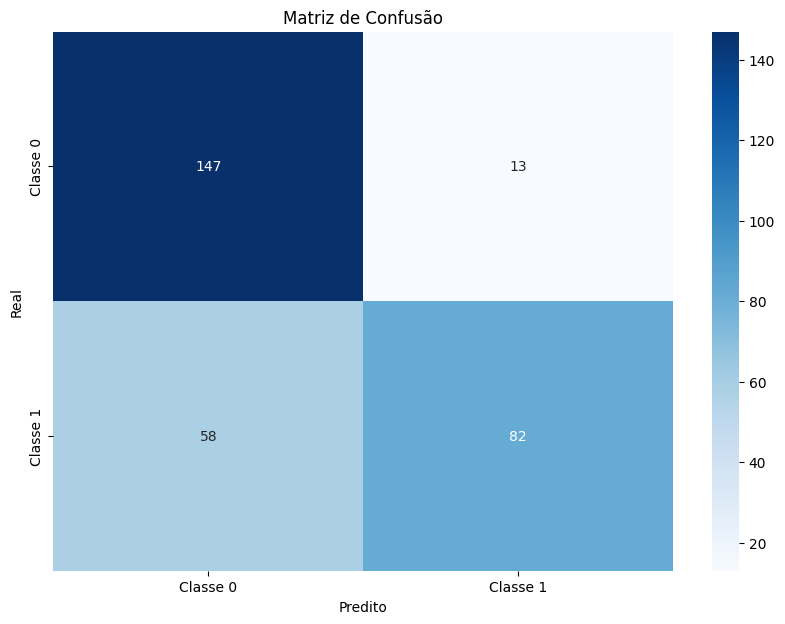

In [5]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidade da classe positiva

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


# 5. Curva ROC

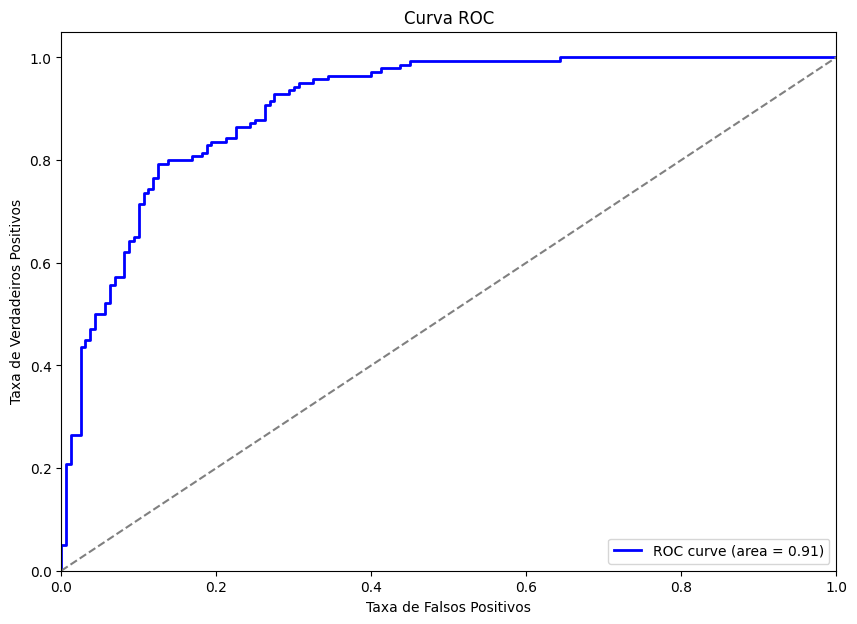

In [6]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a Curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

#6. KNN

Essa análise avalia como o erro de classificação muda com diferentes valores de k para o classificador de K-Vizinhos mais Próximos (KNN).

O que analisar:

* Curva de Erro: Mostra como o erro de classificação varia conforme o número de vizinhos k.

* Valor Ótimo de k: Geralmente, o erro diminui até um ponto e depois começa a aumentar, indicando que há um valor ótimo de k.
Como interpretar:

Um valor muito baixo de k pode levar a um modelo com alta variância (overfitting).
Um valor muito alto de k pode levar a um modelo com alta viés (underfitting).
Escolha o k que minimiza o erro de classificação.

A fronteira de decisão é uma visualização que mostra como o modelo divide o espaço das características em diferentes regiões baseadas nas previsões do modelo.

O que analisar:

* Divisão entre Classes: A forma da fronteira pode indicar como o modelo está separando as classes.

* Complexidade do Modelo: Fronteiras de decisão mais complexas podem indicar um modelo mais adaptado aos dados, enquanto fronteiras simples podem indicar um modelo mais generalizado.

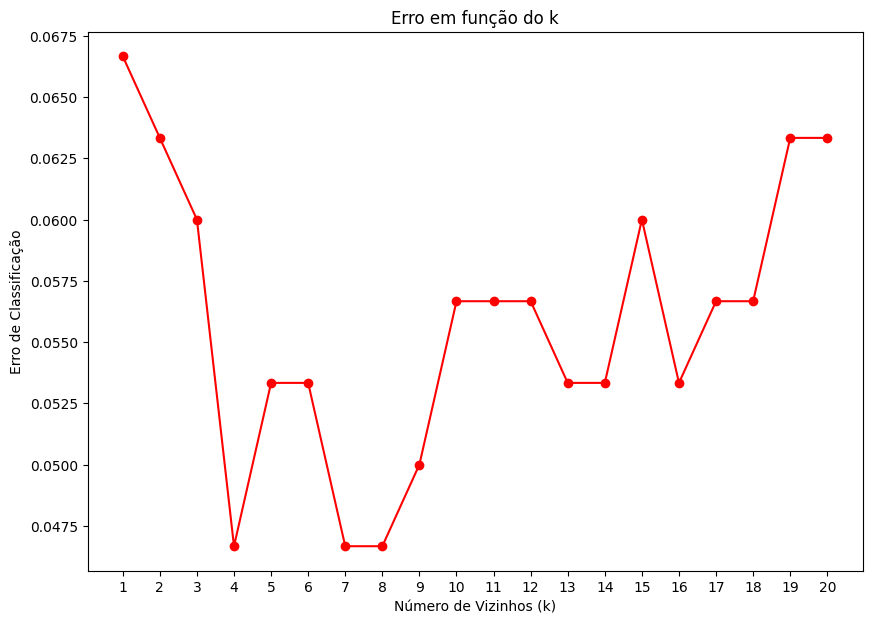

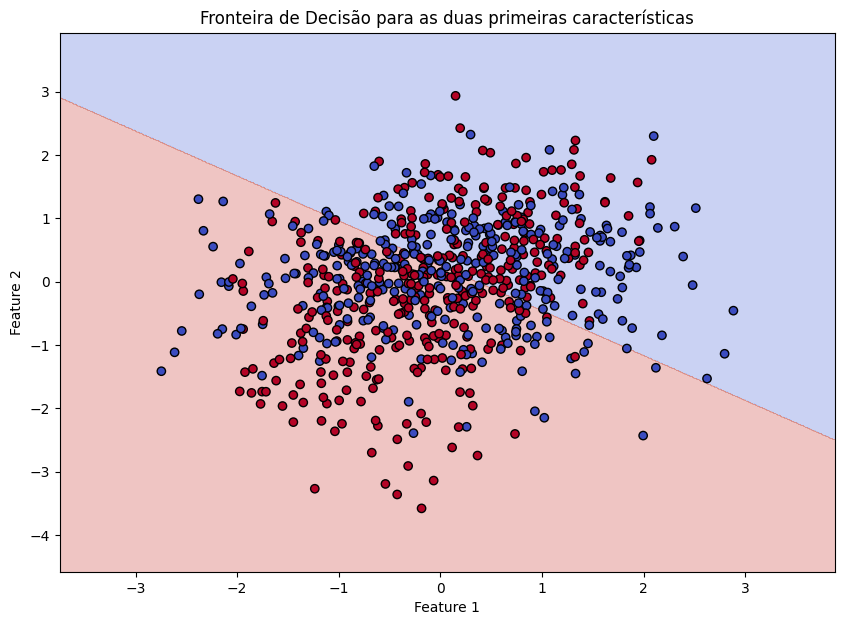

In [7]:
# Erro em função do parâmetro k (para o k de Vizinhos mais Próximos)
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 21)
errors = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_knn_pred = knn.predict(X_test_scaled)
    errors.append(np.mean(y_knn_pred != y_test))

plt.figure(figsize=(10, 7))
plt.plot(k_range, errors, marker='o', linestyle='-', color='red')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Erro de Classificação')
plt.title('Erro em função do k')
plt.xticks(k_range)
plt.show()

# Plotar a Fronteira de Decisão (apenas para duas características)
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Selecionar duas características para visualização da fronteira de decisão
X_train_2d = X_train_scaled[:, :2]
X_test_2d = X_test_scaled[:, :2]

# Treinar o modelo novamente com apenas duas características
model_2d = LogisticRegression(max_iter=1000, random_state=random_state)
model_2d.fit(X_train_2d, y_train)

# Plotar a fronteira de decisão
plot_decision_boundary(X_train_2d, y_train, model_2d, 'Fronteira de Decisão para as duas primeiras características')

#7. Exemplo: Celulares Defeituosos e não Defeituosos

Aplicando a um exemplo prático de como utilizar um algoritmo KNN para classificar celulares como defeituosos e não defeituosos, podemos também incrementar o código, classificando-os com base em um número de ciclos de bateria.

Matriz de Confusão:
 [[74  1]
 [ 0 75]]
Área sob a curva ROC: 0.9990222222222223


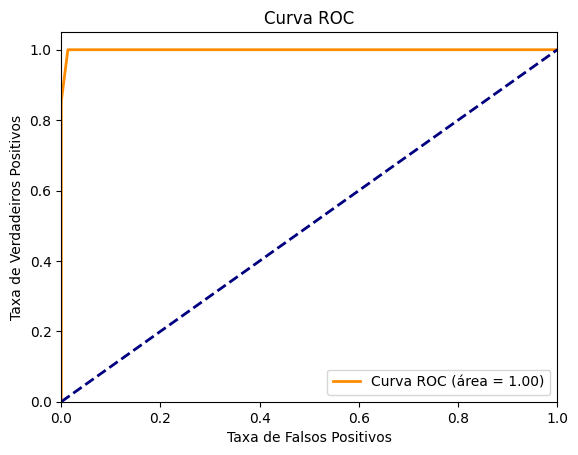

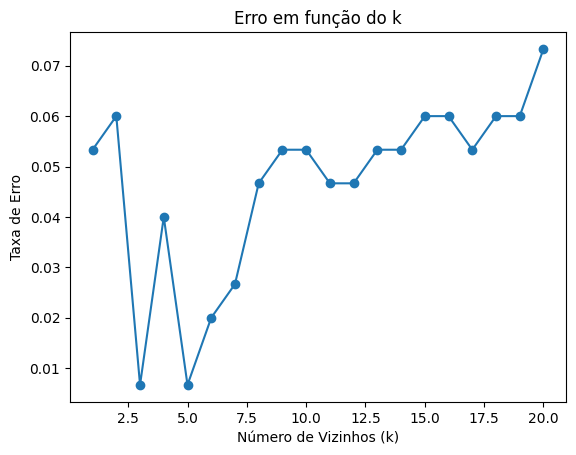

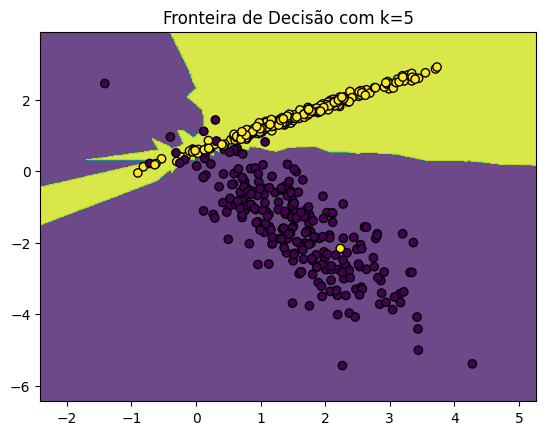


Comentários:
A matriz de confusão mostra o número de classificações corretas e incorretas feitas pelo modelo. A precisão do modelo foi 0.99.
A curva ROC e a área sob a curva (AUC = 1.00) indicam o desempenho geral do classificador. Um AUC próximo de 1.0 sugere que o modelo tem uma boa capacidade de separação entre as classes.
O gráfico de erro em função do número de vizinhos (k) ajuda a identificar o valor de k que minimiza o erro de classificação.
Por fim, a fronteira de decisão visualiza como o classificador separa as duas classes no espaço de variáveis.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

# 1. Crie um conjunto de dados sintético com o objetivo de classificação binária
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.01, class_sep=1.5, random_state=42)

# 2. Divida o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Treine o algoritmo no conjunto de treino
k = 5  # Número de vizinhos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 4. Teste o algoritmo no conjunto de teste
y_pred = knn.predict(X_test)

# 5. Aplique as métricas de avaliação

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print("Área sob a curva ROC:", roc_auc)

# Plot da curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Erro em função do k
errors = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred_k))

plt.figure()
plt.plot(k_range, errors, marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Taxa de Erro')
plt.title('Erro em função do k')
plt.show()

# Fronteira de decisão entre variáveis
h = .02  # tamanho do passo na malha
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Fronteira de Decisão com k=5")
plt.show()

# 6. Comente os resultados
print("\nComentários:")
print(f"A matriz de confusão mostra o número de classificações corretas e incorretas feitas pelo modelo. A precisão do modelo foi {accuracy_score(y_test, y_pred):.2f}.")
print(f"A curva ROC e a área sob a curva (AUC = {roc_auc:.2f}) indicam o desempenho geral do classificador. Um AUC próximo de 1.0 sugere que o modelo tem uma boa capacidade de separação entre as classes.")
print("O gráfico de erro em função do número de vizinhos (k) ajuda a identificar o valor de k que minimiza o erro de classificação.")
print("Por fim, a fronteira de decisão visualiza como o classificador separa as duas classes no espaço de variáveis.")


#8. Conclusão

O KNN pode ser uma ferramenta poderosa para a classificação de celulares defeituosos versus não defeituosos, especialmente quando usado com cuidado na escolha do parâmetro k, na normalização dos dados e na avaliação da performance com métricas como a matriz de confusão e a curva ROC. No entanto, suas limitações devem ser consideradas, especialmente em termos de sensibilidade a ruído, escalabilidade e a necessidade de escolher um k adequado para evitar sobreajuste ou subajuste.